Cycle No:  1
Day No:  1
Beginning Inventory :  3
Daily Demand        :  4
Ending Inventory    :  0
Shortage Quantity   :  1
Order Quantity      :  8
Days until arrival  :  1
Spolied             :  0
-------------------
Day No:  2
Beginning Inventory :  0
Daily Demand        :  3
Ending Inventory    :  0
Shortage Quantity   :  4
Order Quantity      :  8
Days until arrival  :  0
Spolied             :  0
-------------------
Day No:  3
Beginning Inventory :  8
Daily Demand        :  0
Ending Inventory    :  4
Shortage Quantity   :  0
Order Quantity      :  0
Days until arrival  :  -1
Spolied             :  0
-------------------
Day No:  4
Beginning Inventory :  4
Daily Demand        :  2
Ending Inventory    :  2
Shortage Quantity   :  0
Order Quantity      :  0
Days until arrival  :  -2
Spolied             :  0
-------------------
Day No:  5
Beginning Inventory :  1
Daily Demand        :  3
Ending Inventory    :  0
Shortage Quantity   :  2
Order Quantity      :  13
Days until arrival  :  1

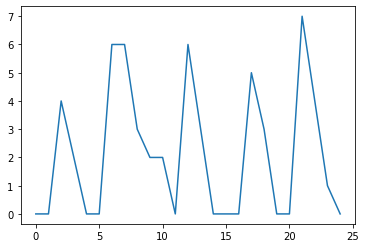

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 11 # maximum capacity
n = 5 # review period

beginning_inventory = 3
daily_demand = 0
ending_inventory = 0
shortage_quantity = 0
order_quantity = 8
days_until_arrival = 2
avgEndingInventory = 0
shortageCount = 0
y = []
expireDate = []
eD = []
wastage = 0
tw = 0
td = 0

for cycle in range(1,6):
    print("Cycle No: ", cycle)
    for day in range(1,n+1):
        print("Day No: ", day)

        days_until_arrival -= 1

        # Check if order arrives
        if days_until_arrival == -1:
            beginning_inventory += order_quantity
            order_quantity = 0
        epoch = beginning_inventory-ending_inventory
        for i in range(len(expireDate)):
            if expireDate[i] == 0:
                wastage += 1
                beginning_inventory -= 1
            else:
                eD.append(expireDate[i])
        expireDate = eD.copy()
        eD.clear()
        for i in range(len(expireDate)):
            expireDate[i]-=1
        for date in range(1, epoch+1):
            expireDate.append(int(np.random.uniform(low=1, high=5, size=None)))
        # Daily demand
        daily_demand = np.random.choice(a=[0,1,2,3,4], p=[0.10, 0.25, 0.35, 0.21, 0.09])
        total_demand = daily_demand + shortage_quantity
        td += total_demand


        if total_demand <= beginning_inventory:
            # No shortage
            ending_inventory = beginning_inventory - total_demand
            shortage_quantity = 0
            expireDate = expireDate[total_demand:].copy()
        else:
            # Shortage
            ending_inventory = 0
            shortage_quantity = total_demand - beginning_inventory
            shortageCount += 1
            expireDate.clear()
        # Check capacity
        if ending_inventory > m:
            ending_inventory = m
        
        # For graph
        y.append(ending_inventory)

        # Review day
        if day==n:
            order_quantity = m - ending_inventory + shortage_quantity
            days_until_arrival = np.random.choice(a=[1,2,3], p=[0.6,0.3,0.1]) # lead time

        # Prints
        print("Beginning Inventory : ", beginning_inventory)
        print("Daily Demand        : ", daily_demand)
        print("Ending Inventory    : ", ending_inventory)
        print("Shortage Quantity   : ", shortage_quantity)
        print("Order Quantity      : ", order_quantity)
        print("Days until arrival  : ", days_until_arrival)
        print("Spolied             : ", wastage)
        print("-------------------")

        beginning_inventory = ending_inventory
        avgEndingInventory += ending_inventory
        tw += wastage
        wastage = 0


    print("-------------------")
    print("-------------------")
avgEndingInventory = avgEndingInventory/(5*n)
print("Average Ending Inventory : ",avgEndingInventory)
print("Total Shortage : ",shortageCount)
print("Total Spoiled : ",tw)
print("Proportion of items taken out due to being spoiled : ",tw/(td+tw))
plt.plot(y)
plt.show()